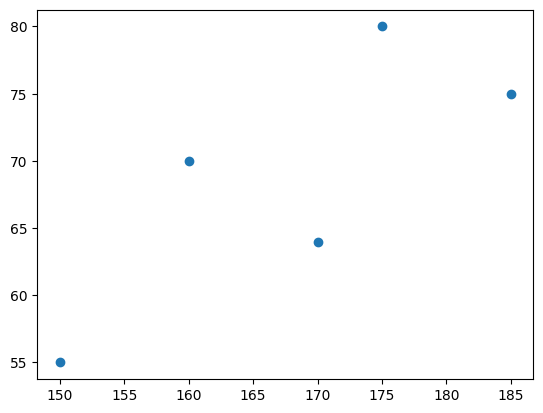

In [2]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([150, 160, 170, 175, 185.]) # 키
y = torch.tensor([55, 70, 64, 80, 75.]) # 몸무게
N = len(x)
plt.plot(x, y, 'o')
plt.show()

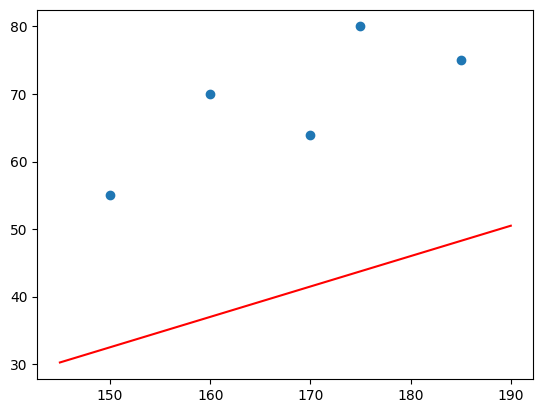

In [3]:
# 초기값 설정
a = 0.45
b = -35
x_plot = torch.linspace(145, 190, 100)
y_plot = a * x_plot + b
plt.plot(x, y, 'o')
plt.plot(x_plot, y_plot, 'r')
plt.show()

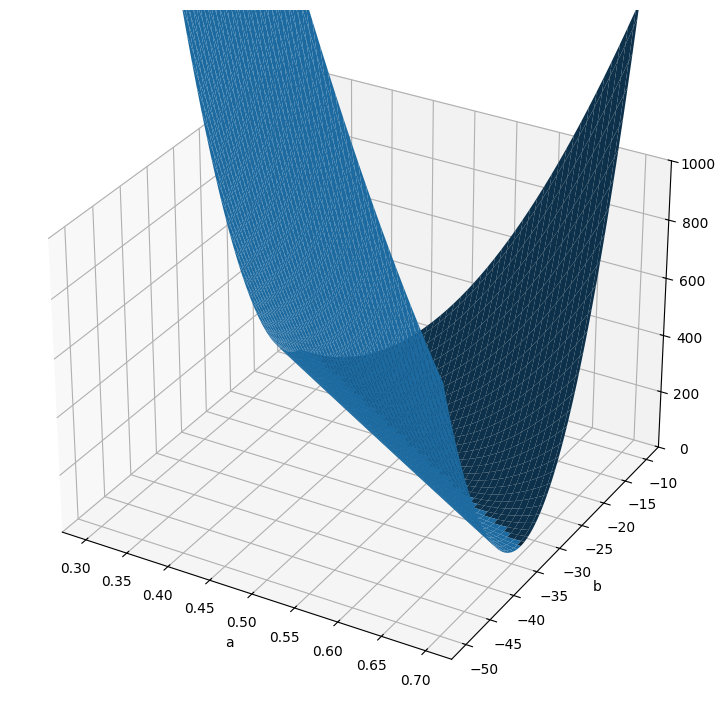

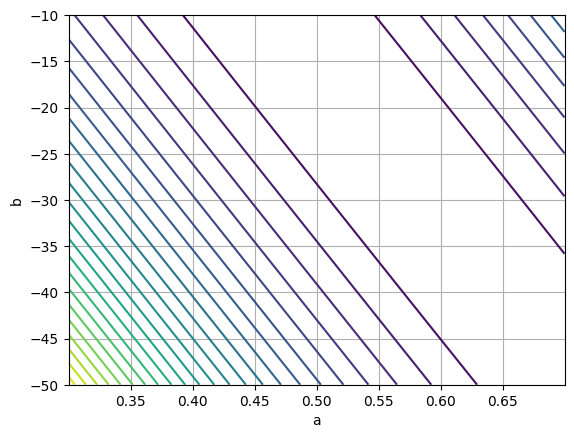

In [13]:
# a, b를 바꿔가면서 Loss 값을 일일히 구해서 가장 작아지게 하는 a, b를 선정
a = 0.5 + torch.linspace(-0.2, 0.2, 100)
b = -30 + torch.linspace(-20, 20, 100)

L = torch.zeros(len(b), len(a))
for i in range(len(b)):
    for j in range(len(a)):
        for n in range(N):
            L[i, j] = L[i, j] + (y[n] - (a[j] * x[n] + b[i])) ** 2
    
L = L/N # MSE

plt.figure(figsize=(10, 9))
ax = plt.axes(projection='3d')
A, B = torch.meshgrid(a, b)
ax.plot_surface(A, B, L)
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.set_zlim([0, 1000])

plt.figure()
plt.contour(a, b, L, 30)
plt.xlabel('a'); plt.ylabel('b'); plt.grid()

In [14]:
print(torch.min(L))
a_opt = A[L==torch.min(L)]
b_opt = B[L==torch.min(L)]
print(f'optimal a = {a_opt}')
print(f'optimal b = {b_opt}')

tensor(29.0315)
optimal a = tensor([0.5424])
optimal b = tensor([-23.7374])


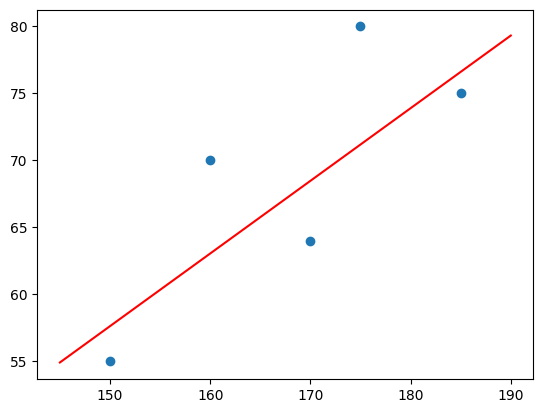

In [15]:
x_plot = torch.linspace(145, 190, 100)
y_plot = a_opt * x_plot + b_opt
plt.plot(x, y, 'o')
plt.plot(x_plot, y_plot, 'r')

Epoch: 1, train loss: 826.2250
Weight: 0.4785, Bias: -34.9998


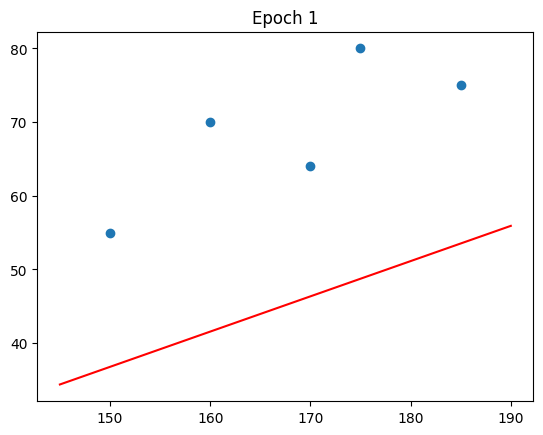

--------------------
Epoch: 2, train loss: 578.0414
Weight: 0.5022, Bias: -34.9997


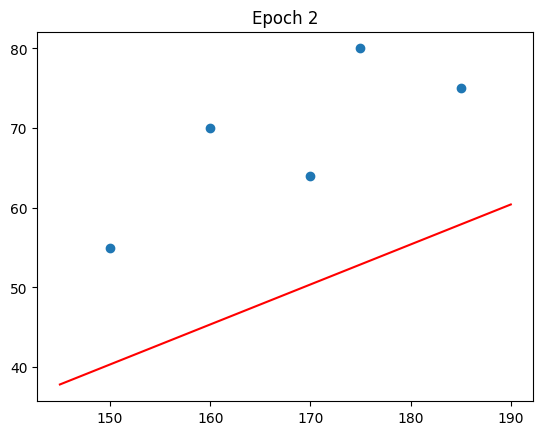

--------------------
Epoch: 3, train loss: 407.1602
Weight: 0.5218, Bias: -34.9996


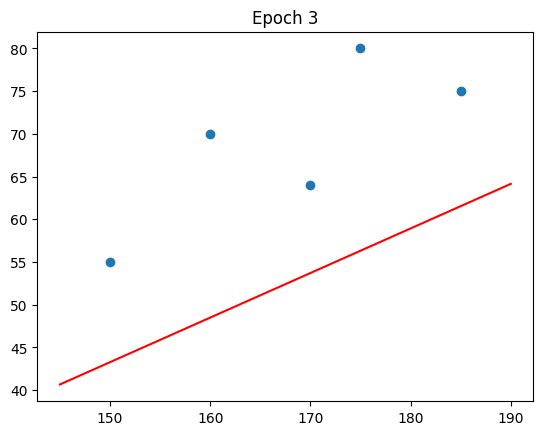

--------------------
Epoch: 4, train loss: 289.5042
Weight: 0.5381, Bias: -34.9995


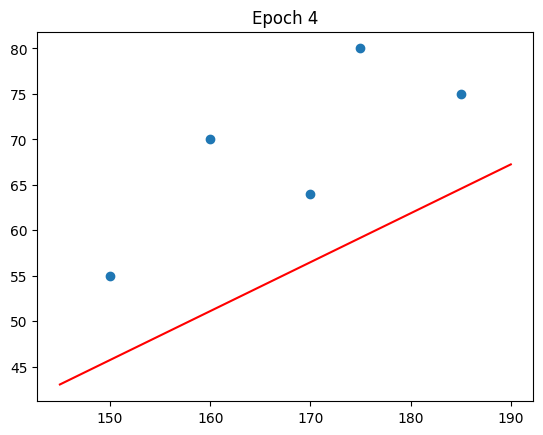

--------------------
Epoch: 5, train loss: 208.4954
Weight: 0.5517, Bias: -34.9994


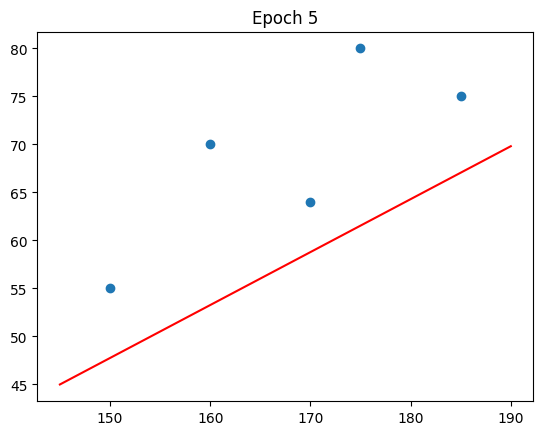

--------------------
Epoch: 6, train loss: 152.7187
Weight: 0.5629, Bias: -34.9993


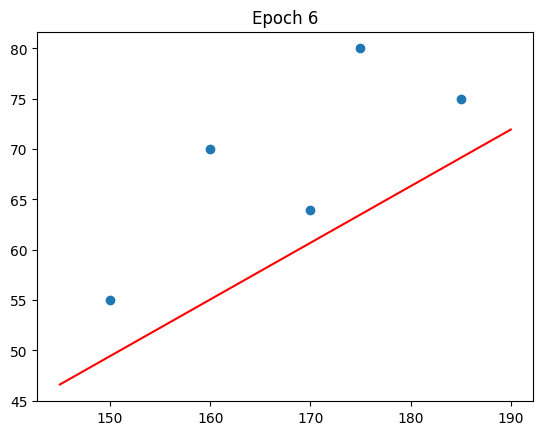

--------------------
Epoch: 7, train loss: 114.3153
Weight: 0.5722, Bias: -34.9993


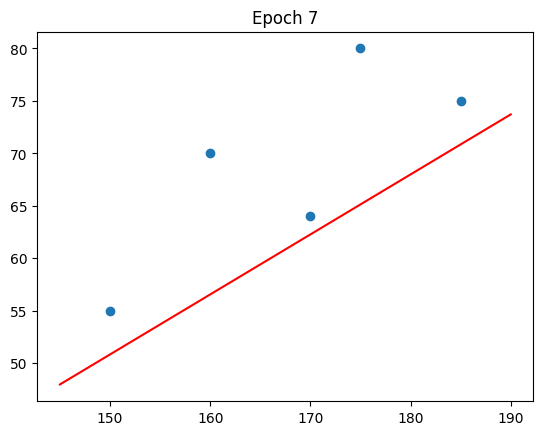

--------------------
Epoch: 8, train loss: 87.8735
Weight: 0.5799, Bias: -34.9992


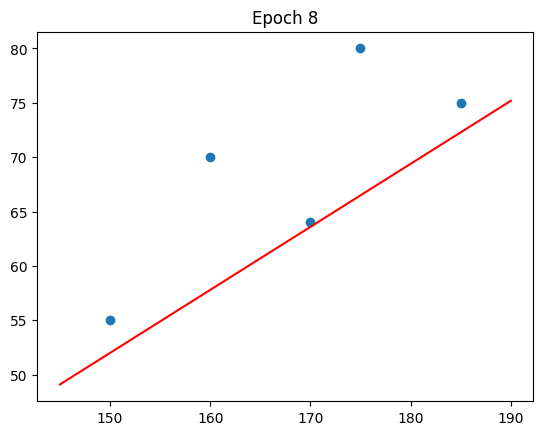

--------------------
Epoch: 9, train loss: 69.6676
Weight: 0.5863, Bias: -34.9992


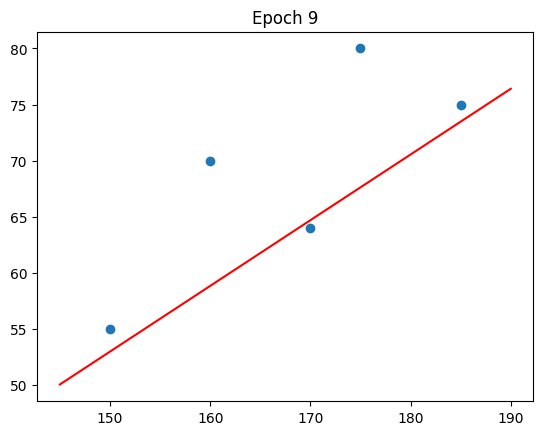

--------------------
Epoch: 10, train loss: 57.1324
Weight: 0.5917, Bias: -34.9992


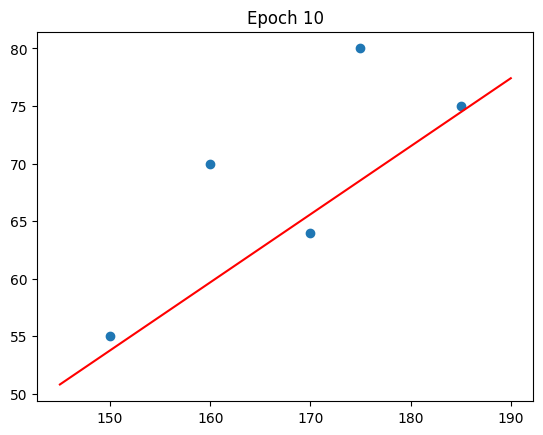

--------------------
Epoch: 11, train loss: 48.5017
Weight: 0.5961, Bias: -34.9991


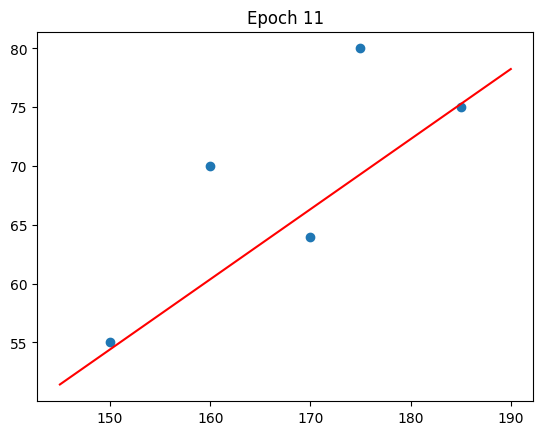

--------------------
Epoch: 12, train loss: 42.5591
Weight: 0.5997, Bias: -34.9991


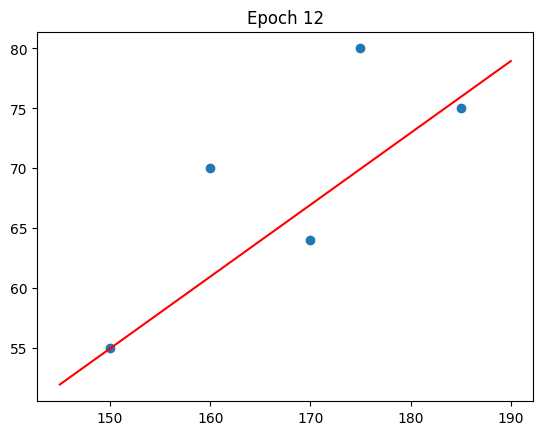

--------------------
Epoch: 13, train loss: 38.4676
Weight: 0.6028, Bias: -34.9991


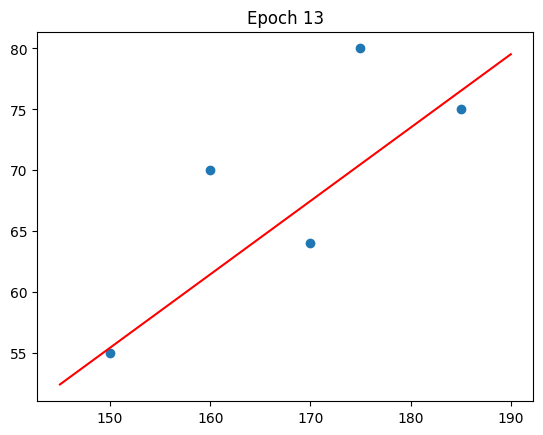

--------------------
Epoch: 14, train loss: 35.6504
Weight: 0.6053, Bias: -34.9991


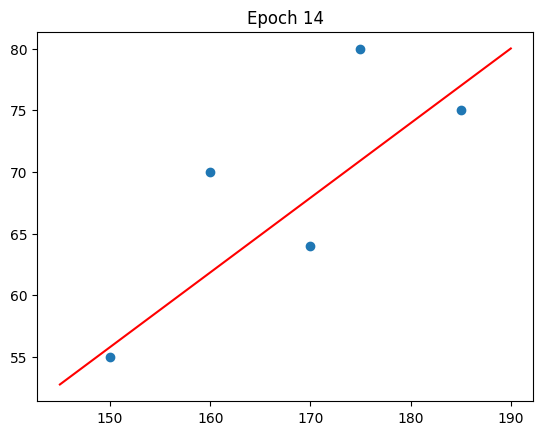

--------------------
Epoch: 15, train loss: 33.7107
Weight: 0.6074, Bias: -34.9991


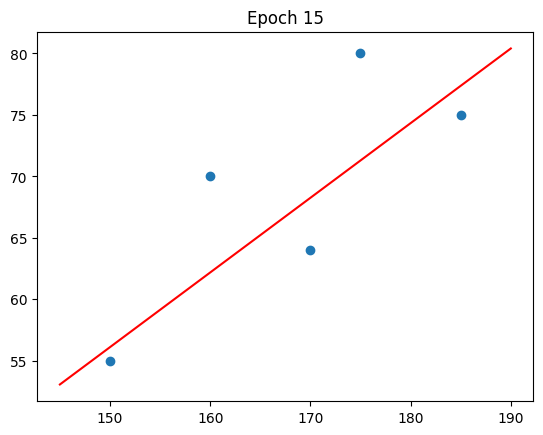

--------------------
Epoch: 16, train loss: 32.3752
Weight: 0.6091, Bias: -34.9991


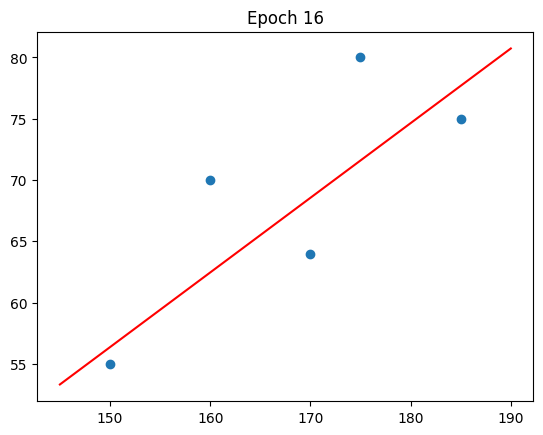

--------------------
Epoch: 17, train loss: 31.4557
Weight: 0.6106, Bias: -34.9990


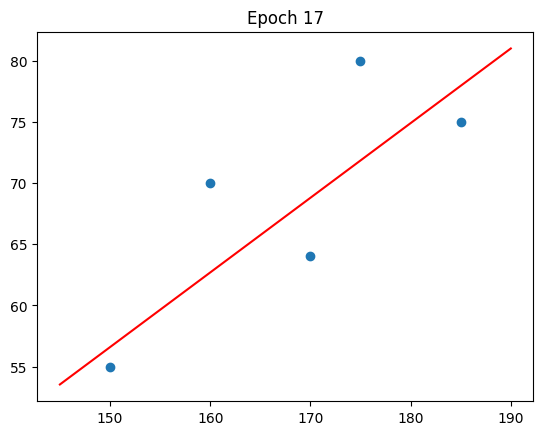

--------------------
Epoch: 18, train loss: 30.8226
Weight: 0.6118, Bias: -34.9990


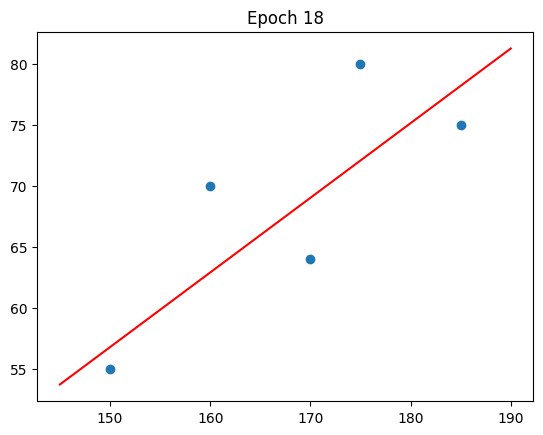

--------------------
Epoch: 19, train loss: 30.3866
Weight: 0.6127, Bias: -34.9990


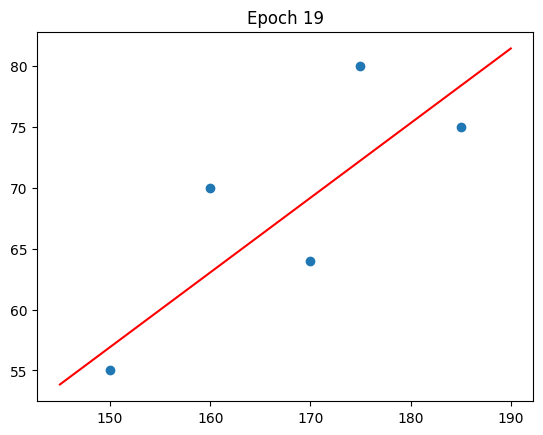

--------------------
Epoch: 20, train loss: 30.0865
Weight: 0.6136, Bias: -34.9990


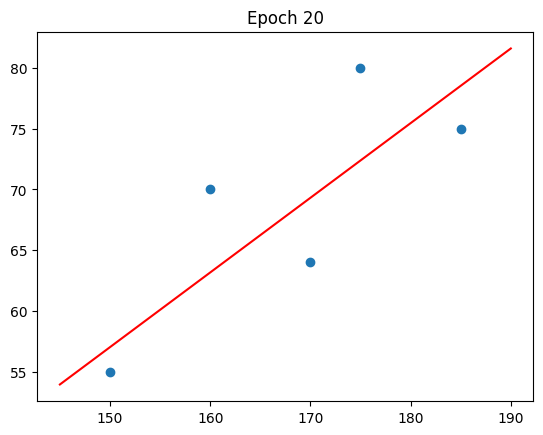

--------------------


In [20]:
# 모델 파라미터 초기화
a = torch.tensor([0.45], requires_grad=True)
b = torch.tensor([-35.], requires_grad=True)

# 하이퍼파라미터 설정
LR = 3e-6
EPOCH = 20

loss_history = []

for ep in range(EPOCH):
    # inference
    y_hat = a * x + b
    
    # loss
    loss = 0
    for n in range(N):
        loss += (y[n] - y_hat[n]) ** 2
        
    loss = loss/N # MSE
    
    # update
    loss.backward() # backpropagation
    with torch.no_grad():
        a -= LR * a.grad # weight update
        b -= LR * b.grad
    a.grad = torch.tensor([0.]) # gradient 초기화
    b.grad = torch.tensor([0.])
    
    # print loss
    loss_history += [loss.item()]
    print(f'Epoch: {ep+1}, train loss: {loss.item():.4f}')
    print(f'Weight: {a.item():.4f}, Bias: {b.item():.4f}')
    
    # plot graph
    x_plot = torch.linspace(145, 190, 100)
    y_plot = a.detach() * x_plot + b.detach()
    plt.figure()
    plt.plot(x, y, 'o')
    plt.plot(x_plot, y_plot, 'r')
    plt.title(f'Epoch {ep+1}')
    plt.show()
    
    print('-' * 20)

In [ ]:
# grad 초기화 필요한 이유 실험
z = torch.tensor([1.], requires_grad=True)
for _ in range(2):
    loss = z**2
    loss.backward()
    print(z.grad)

tensor([2.])
tensor([4.])


Epoch : 1, train loss: 900.5650
Weight: 0.6136, Bias: -34.9990


c:\Users\jyj1206\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


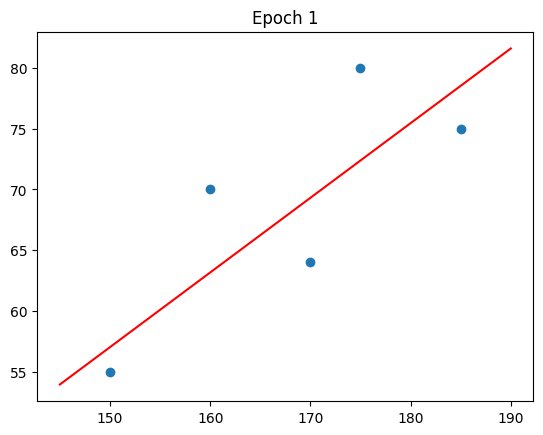

--------------------
Epoch : 2, train loss: 660.9294
Weight: 0.6136, Bias: -34.9990


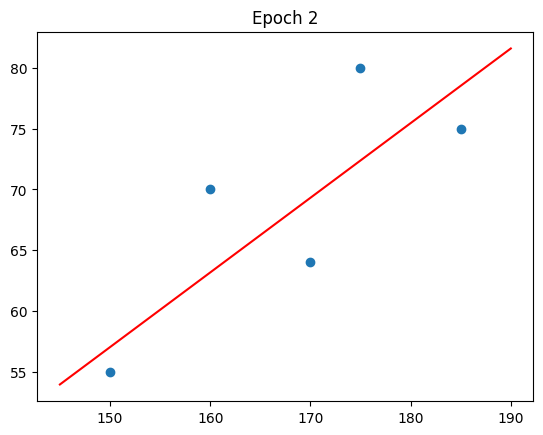

--------------------
Epoch : 3, train loss: 495.9343
Weight: 0.6136, Bias: -34.9990


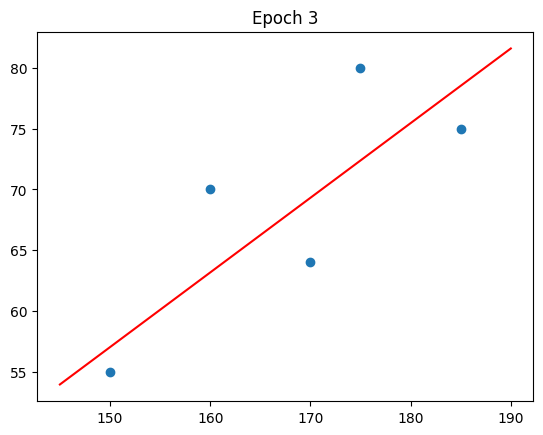

--------------------
Epoch : 4, train loss: 382.3307
Weight: 0.6136, Bias: -34.9990


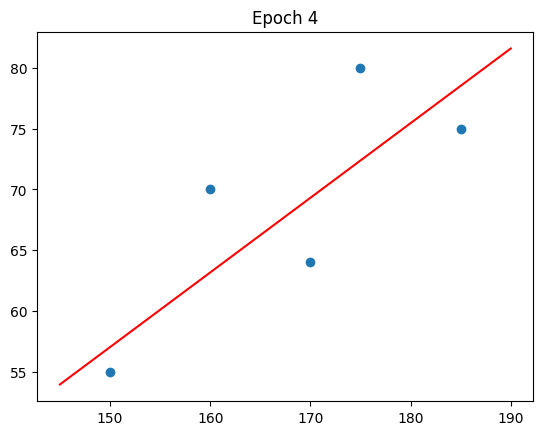

--------------------
Epoch : 5, train loss: 304.1121
Weight: 0.6136, Bias: -34.9990


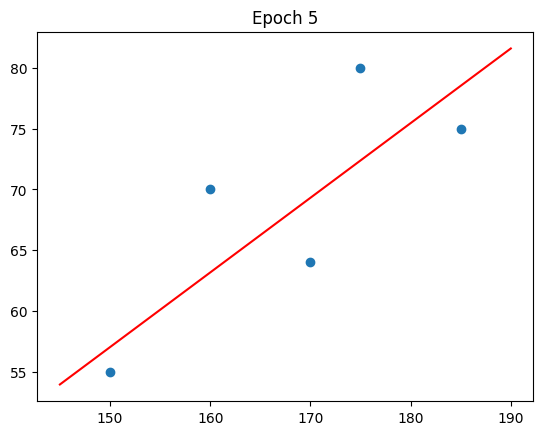

--------------------
Epoch : 6, train loss: 250.2566
Weight: 0.6136, Bias: -34.9990


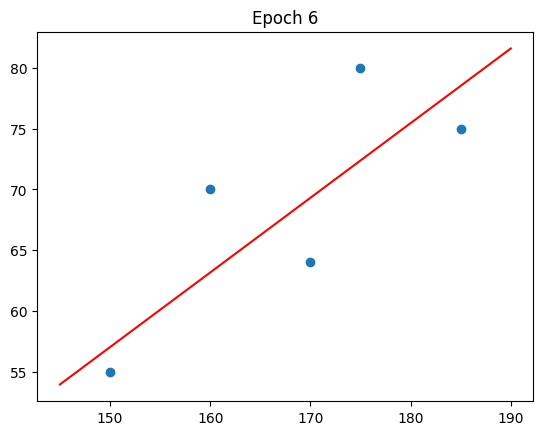

--------------------
Epoch : 7, train loss: 213.1756
Weight: 0.6136, Bias: -34.9990


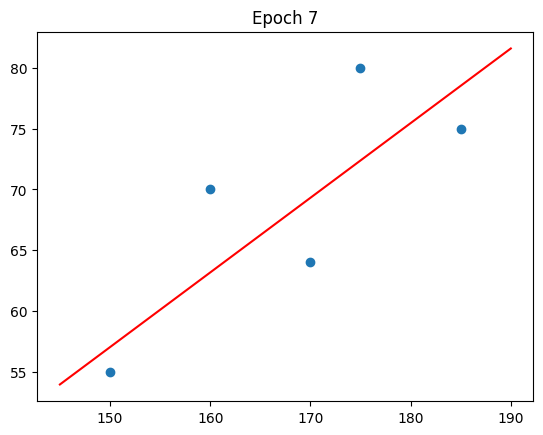

--------------------
Epoch : 8, train loss: 187.6445
Weight: 0.6136, Bias: -34.9990


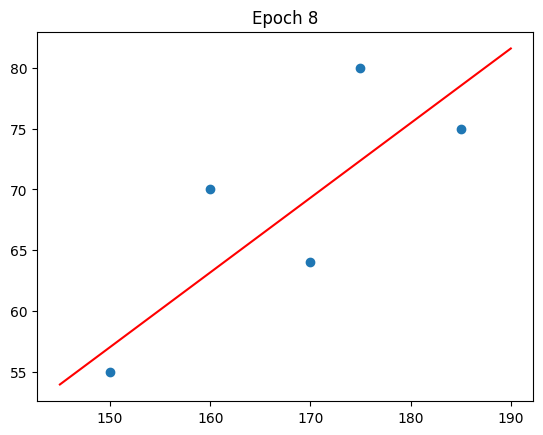

--------------------
Epoch : 9, train loss: 170.0657
Weight: 0.6136, Bias: -34.9990


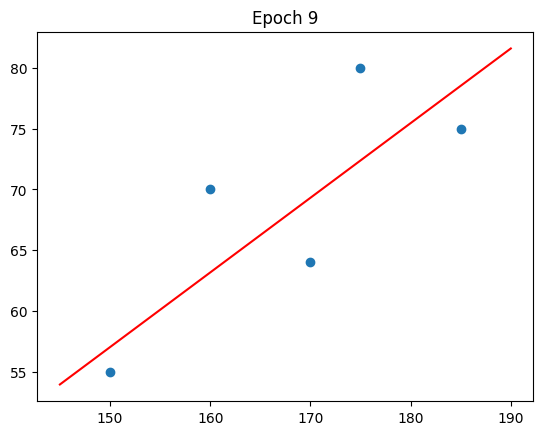

--------------------
Epoch : 10, train loss: 157.9622
Weight: 0.6136, Bias: -34.9990


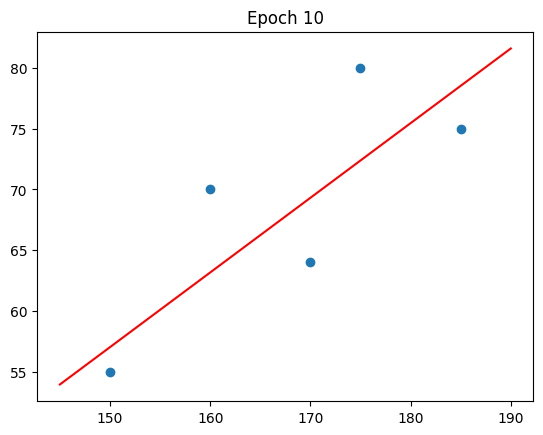

--------------------
Epoch : 11, train loss: 149.6288
Weight: 0.6136, Bias: -34.9990


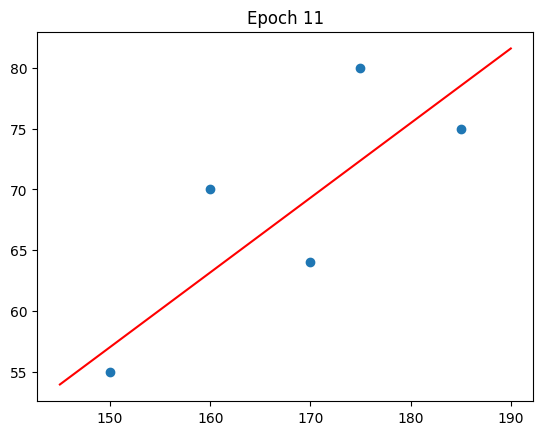

--------------------
Epoch : 12, train loss: 143.8909
Weight: 0.6136, Bias: -34.9990


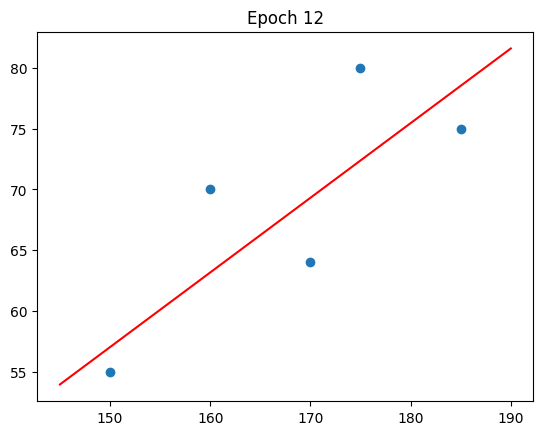

--------------------
Epoch : 13, train loss: 139.9402
Weight: 0.6136, Bias: -34.9990


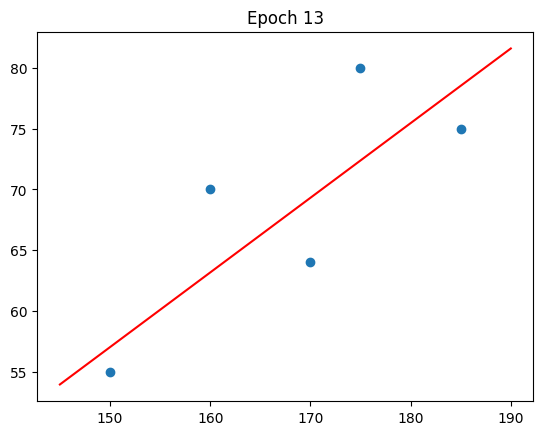

--------------------
Epoch : 14, train loss: 137.2202
Weight: 0.6136, Bias: -34.9990


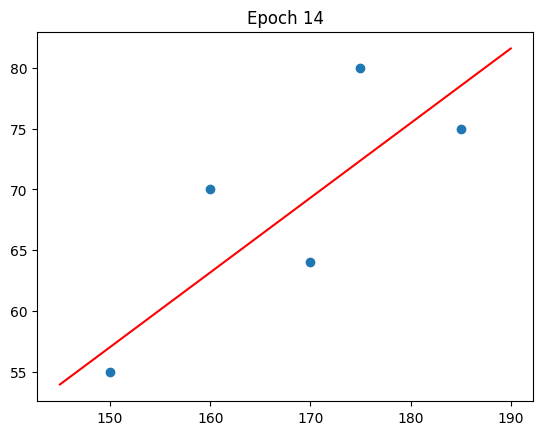

--------------------
Epoch : 15, train loss: 135.3472
Weight: 0.6136, Bias: -34.9990


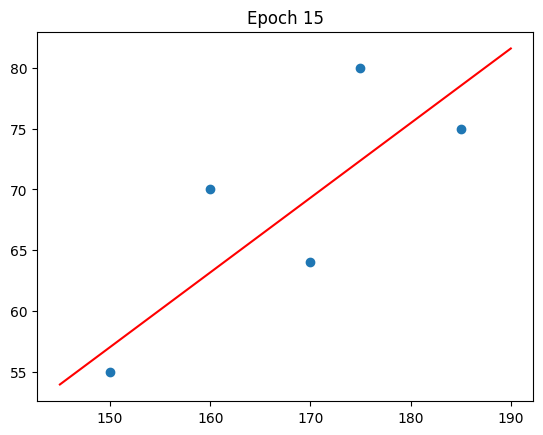

--------------------
Epoch : 16, train loss: 134.0578
Weight: 0.6136, Bias: -34.9990


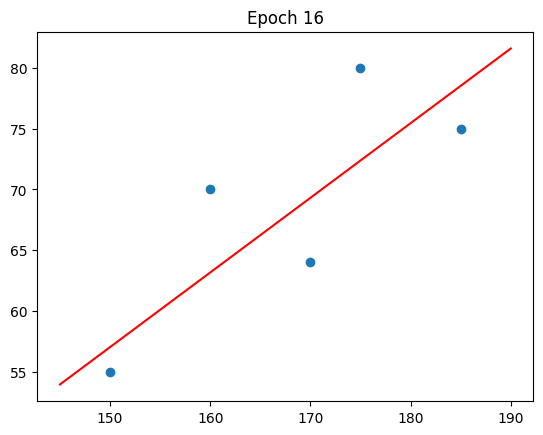

--------------------
Epoch : 17, train loss: 133.1698
Weight: 0.6136, Bias: -34.9990


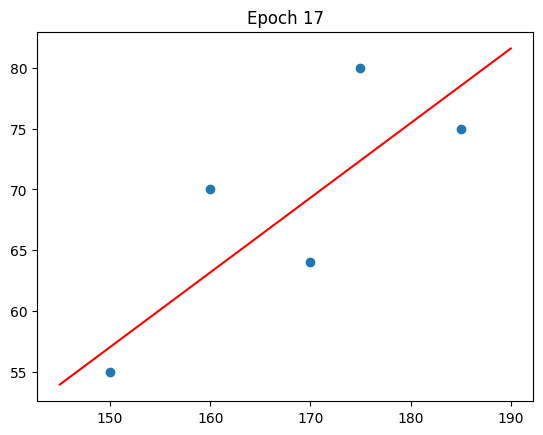

--------------------
Epoch : 18, train loss: 132.5586
Weight: 0.6136, Bias: -34.9990


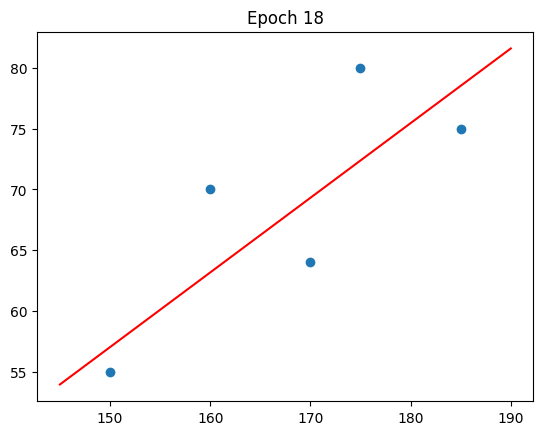

--------------------
Epoch : 19, train loss: 132.1376
Weight: 0.6136, Bias: -34.9990


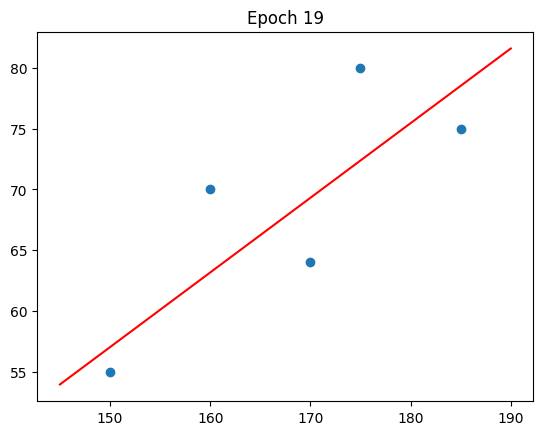

--------------------
Epoch : 20, train loss: 131.8478
Weight: 0.6136, Bias: -34.9990


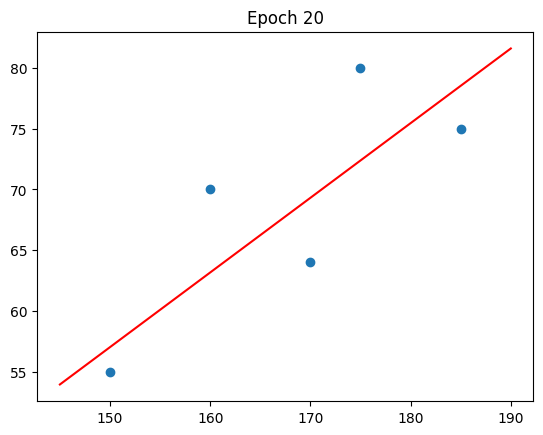

--------------------


In [21]:
# pytorch로 구현
from torch import nn, optim

x = x.reshape(-1, 1)

model = nn.Linear(1, 1)
model.weight.data = torch.tensor([[0.45]])
model.bias.data = torch.tensor([[-35.]])

LR = 3e-6
EPOCH = 20
optimizer = optim.SGD(model.parameters(), lr=LR)
criterion = nn.MSELoss()

loss_history = []

for ep in range(EPOCH):
    # inference
    y_hat = model(x)
    
    # loss
    loss = criterion(y_hat, y)
    
    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # backpropagation
    optimizer.step() # weight update
    
    # print loss
    loss_history = [loss.item()]
    print(f'Epoch : {ep+1}, train loss: {loss.item():.4f}')
    
    # print weight and bias
    print(f'Weight: {a.item():.4f}, Bias: {b.item():.4f}')
    
    # plot graph
    x_plot = torch.linspace(145, 190, 100)
    y_plot = a.detach() * x_plot + b.detach()
    plt.figure()
    plt.plot(x, y, 'o')
    plt.plot(x_plot, y_plot, 'r')
    plt.title(f'Epoch {ep+1}')
    plt.show()
    
    print('-' * 20)